<a href="https://colab.research.google.com/github/gowthamkrishna555/Project-AIML/blob/main/day5%2C6%2C7%2C8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [3]:
y=df['target']

In [4]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
x=df.drop('target',axis=1)

In [6]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

We are dividing the whole dataset as 70% for training and 30% of the data which is used for testing purpose

In [8]:
df.shape

(303, 14)

In [9]:
x_train.shape

(212, 13)

In [10]:
y_train.shape

(212,)

In [11]:
x_test.shape

(91, 13)

In [12]:
y_test.shape

(91,)

In [13]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(penalty='l2',solver='newton-cg',C=5)

In [14]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=5, solver='newton-cg')

In [15]:
y_pred_lr=lr_model.predict(x_test)

In [16]:
y_pred_lr

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred_lr,y_test)
acc

0.8461538461538461

We try to find the accuracy in knn model also

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
knn=KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
accuracy=knn.score(x_train,y_train)

In [23]:
accuracy

0.8066037735849056

In [24]:
acc=knn.score(x_test,y_test)
acc

0.6373626373626373

We try to find the accuracy in the decisiontree model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=model.predict(x_test)

In [29]:
accuracy=accuracy_score(y_test,y_pred)

In [30]:
accuracy

0.7032967032967034

In [31]:
val=list(np.arange(0.01,1,0.1))
val

[0.01,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.6100000000000001,
 0.7100000000000001,
 0.81,
 0.91]

Since we are having a comparatively good accuracy in the logistic regression model we try to increase the regression of it to make it better

In [32]:
from sklearn.model_selection import GridSearchCV
model_lr=LogisticRegression(penalty='l2')
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}
clf_lr=GridSearchCV(model_lr,parameters)
clf_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.11, 0.21000000000000002,
                               0.31000000000000005, 0.41000000000000003, 0.51,
                               0.6100000000000001, 0.7100000000000001, 0.81,
                               0.91],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [33]:
print(clf_lr.best_params_)

{'C': 0.41000000000000003, 'solver': 'liblinear'}


In [34]:
test_pred=clf_lr.predict(x_test)

In [35]:
acc_lr_gs=accuracy_score(test_pred,y_test)
acc_lr_gs

0.8131868131868132

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[32,  8],
       [ 9, 42]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [38]:
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import train_test_split

In [39]:
model=LogisticRegression(penalty='l2')

In [40]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred=model.predict(x_test)

In [42]:
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision

0.84

In [43]:
recall

0.8235294117647058

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [46]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [48]:
accuracy=knn.score(x_train,y_train)

In [49]:
accuracy

0.7405660377358491

We try to find the accuracy of the dataset using the knn model

In [50]:
acc=knn.score(x_test,y_test)
acc

0.6263736263736264

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

We try to find the accuracy using the decision tree model

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=model.predict(x_test)

In [55]:
accuracy=accuracy_score(y_test,y_pred)

In [56]:
accuracy

0.8360655737704918

In [57]:
val=list(np.arange(0.01,1,0.1))

We try to build the model for logistic Regression

In [58]:
from sklearn.model_selection import GridSearchCV
model_lr=LogisticRegression(penalty='l2')
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}
clf_lr=GridSearchCV(model_lr,parameters)
clf_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.11, 0.21000000000000002,
                               0.31000000000000005, 0.41000000000000003, 0.51,
                               0.6100000000000001, 0.7100000000000001, 0.81,
                               0.91],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [59]:
print(clf_lr.best_params_)

{'C': 0.21000000000000002, 'solver': 'liblinear'}


In [60]:
test_pred=clf_lr.predict(x_test)

In [61]:
acc_lr_gs=accuracy_score(test_pred,y_test)
acc_lr_gs

0.8852459016393442

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[25,  3],
       [ 4, 29]])

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[25,  3],
       [ 4, 29]])

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We try to find the confusion matrix for the knn model

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
clf_knn = GridSearchCV(model_knn, parameters, scoring='accuracy')
clf_knn.fit(x_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
print(clf_knn.best_params_)

{'n_neighbors': 3, 'weights': 'uniform'}


In [67]:
test_pred=clf_knn.predict(x_test)

In [68]:
acc_knn_gs=accuracy_score(test_pred,y_test)
acc_knn_gs

0.6557377049180327

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[20, 12],
       [ 9, 20]])

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



We try to build the confusion matrix for decision tree model

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_dt = DecisionTreeClassifier()
parameters = {'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
clf_dt = GridSearchCV(model_dt, parameters, scoring='accuracy')
clf_dt.fit(x_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9]},
             scoring='accuracy')

In [72]:
print(clf_dt.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [73]:
test_pred=clf_dt.predict(x_test)

In [74]:
acc_dt_gs=accuracy_score(test_pred,y_test)
acc_dt_gs

0.819672131147541

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[24,  6],
       [ 5, 26]])

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [77]:
logreg_probs=clf_lr.predict_proba(x_test)
Knn_probs=knn.predict_proba(x_test)
Dtree_probs=model.predict_proba(x_test)

In [78]:
#keep probabilities for the positive outcome only
logreg_probs=logreg_probs[:, 1]
Knn_probs=Knn_probs[:, 1]
Dtree_probs=Dtree_probs[:, 1]

In [79]:
from sklearn.metrics import roc_curve
#fpr--> False Positive Rate
#tpr-->True Positive Rate
logreg_fpr,logreg_tpr,lr_thres=roc_curve(y_test,logreg_probs)
Knn_fpr,Knn_tpr,Knn_thres=roc_curve(y_test,Knn_probs)
Dtree_fpr,Dtree_tpr,Dtree_thres=roc_curve(y_test,Dtree_probs)

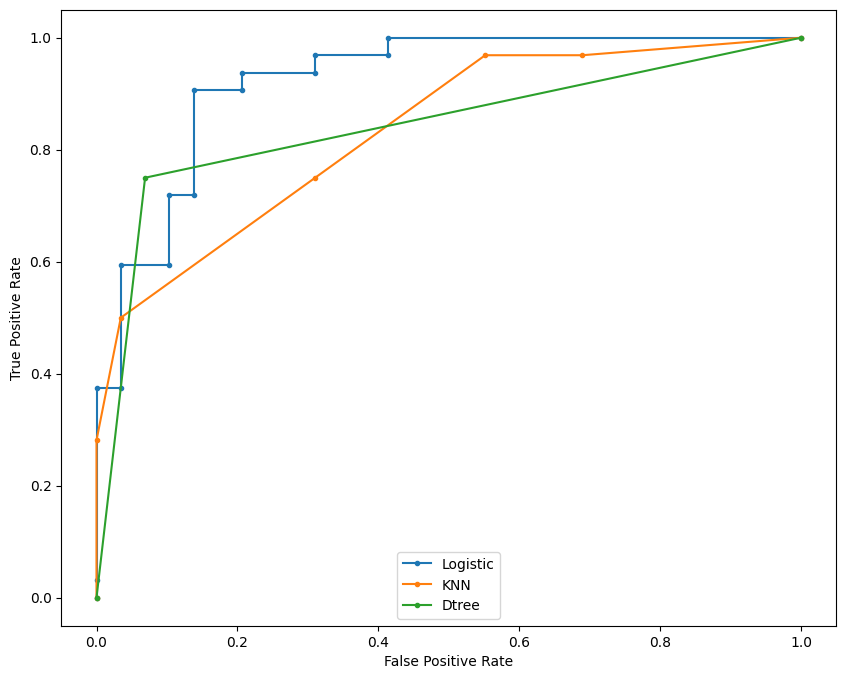

In [80]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr,logreg_tpr,marker='.',label='Logistic')
ax.plot(Knn_fpr,Knn_tpr,marker='.',label='KNN')
ax.plot(Dtree_fpr,Dtree_tpr,marker='.',label='Dtree')
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend(loc=8)
#show the plot
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
#calculate scores
logreg_auc=roc_auc_score(y_test,logreg_probs)
Knn_auc=roc_auc_score(y_test,Knn_probs)
Dtree_auc=roc_auc_score(y_test,Dtree_probs)
print('Logistic:ROC AUC={} %'.format(round(logreg_auc,3)*100))
print('KNN:ROC AUC={}%'.format(round(Knn_auc,3)*100))
print('DTree:ROC AUC={}%'.format(round(Dtree_auc,3)*100))

Logistic:ROC AUC=92.5 %
KNN:ROC AUC=83.2%
DTree:ROC AUC=84.1%


Here we get to know that the Logistic regression model is one of the best model

We try to take the input from the user and check whether our model works correctly or not

In [84]:
from pandas.core.window.expanding import ExpandingGroupby
from matplotlib.projections.polar import ThetaAxis
n = int(input("Enter no of Patients who's Status is to be Determined :- "))

def Prediction() :
  age = int(input("Age of the Patient :- "))
  sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  cp = int(input("Chest Pain Type :- "))
  trestbps = int(input("Resting Blood Pressure :- "))
  chol = int(input("Serum Cholestrol :- "))
  fbs = int(input("Fasting Blood Sugar :- "))
  restecg = int(input("Resting ElectroCardiographic Result :- "))
  thalach = int(input("Maximum Heart Rate Achieved :- "))
  exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  slope = int(input("Slope of Peak Exercise ST segment :- "))
  ca = int(input("No. of Major Vessels (0-3) :- "))
  thal = int(input("Thalasemia Indicator :- "))
  new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  new_patient = new_patient.reshape(1,-1) #converting to 2D array

  if clf_lr.predict(new_patient) == 0 :
    return "The Patient with the above provided Vitals Dies!!!"
  else :
    return "The Patient with the above provided vitals Lives!!!"

for i in range(n) :
  print(Prediction())
     

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 60
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 3
Resting Blood Pressure :- 150
Serum Cholestrol :- 240
Fasting Blood Sugar :- 1
Resting ElectroCardiographic Result :- 0
Maximum Heart Rate Achieved :- 150
Exercise-include angina (1 - True, 0 - False) :- 0
ST Depression induced by Exercise relative to Rest :- 2.3
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 0
Thalasemia Indicator :- 1
The Patient with the above provided vitals Lives!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
